<a href="https://colab.research.google.com/github/VitorFRodrigues/Polo_Tech_Americanas/blob/main/Polo_Tech/Modulo_05/Projeto/Projeto_Mod05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise das médias de carros brasileiros de 2022 - Tabela FIPE

---

Autores: 
  - George Pontes da Cunha
  - João Estevan Leoncio da Silva Barbosa
  - Matheus Keoma Steinbach
  - Vitor Fernando de Souza Rodrigues
  - Willian Wallace Ribeiro Alves da Silva

e-mails / github: 
  - george.pontes02@gmail.com / https://github.com/georgecnha
  - jestevan12@gmail.com / https://github.com/joaoestevanbarbosa
  - keoma.steinbach@gmail.com / https://github.com/matheuskeomas
  - vitorfbaiano@gmail.com / https://github.com/VitorFRodrigues/
  - willianwra09@gmail.com / https://github.com/willianwrasilva

---

## 1.Introdução

Nos últimos anos a Pandemia tem ocasionado grandes estragos em escala global. Seja nas mais diversas áreas, o ser humano passou por grandes adaptações. No setor econômico não foi diferente, grandes cadeias de fornecimento foram paralizadas por um tempo o que acabou ocasionando atrasos e custos inevitáveis.

Atualmente ainda estamos sentindo dos reflexos nos preços dos itens básicos e voláteis e o mesmo aconteceu com o custo dos veículos. A cadeia de produção de matéria prima como aço e semicondutores (*chips*) tem elevado o custo final os veículos.

Neste trabalho, vamos analisar o custo dos veículos de acordo com a tabela [FIPE](https://veiculos.fipe.org.br/). Os dados foram retirados semi tratados do [kaggle](https://https://www.kaggle.com/datasets/vagnerbessa/average-car-prices-bazil).

## 2.Objetivos

### 2.1.Objetivo Geral

Como objetivo geral, temos a intenção de criar um algoritmo de machine learning (ML) para utilizar das informações dos veículos levantados pela tabela para prever custos de outros.

### 2.2.Objetivos Específicos

- Realizar preparação e limpeza dos dados;
- Fazer uma análise exploratória;
- Aplicar função de correlação em busca de features úteis para o algoritmo;
- Criar dois pipelines com algoritmos de ML e realizar comparações entre estes.


## 3.Preparação e Limpeza dos Dados

Vamos iniciar importando as bibliotecas e os dados que serão utilizados para esta seção.

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Remoção de warnings que possam aparecer durante execução do Notebook
import warnings
warnings.filterwarnings('ignore')

Os datasets usados estão salvos no github conforme url abaixo.

In [137]:
url = 'https://raw.githubusercontent.com/VitorFRodrigues/Polo_Tech_Americanas/main/Polo_Tech/Modulo_05/Projeto/dataset/fipe_2022.csv'

In [138]:
dados = pd.read_csv(url)
dados.head()

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl,age_years
0,2022,January,038001-6,vwmrywl5qs,Acura,NSX 3.0,Gasoline,manual,3.0,1995,43779.0,28
1,2022,January,038001-6,t9mt723qhz,Acura,NSX 3.0,Gasoline,manual,3.0,1994,42244.0,29
2,2022,January,038001-6,tr5wv4z21g,Acura,NSX 3.0,Gasoline,manual,3.0,1993,40841.0,30
3,2022,January,038001-6,s2xxsjz3mt,Acura,NSX 3.0,Gasoline,manual,3.0,1992,39028.0,31
4,2022,January,038001-6,rtm9gj7zk8,Acura,NSX 3.0,Gasoline,manual,3.0,1991,35678.0,32


A descrição dos dados é informada no [Kaggle](https://https://www.kaggle.com/datasets/vagnerbessa/average-car-prices-bazil). A título informativo, segue abaixo descrição básica do que cada coluna (feature) informa:

- ```year_of_reference```: ano de referência da observação, ou seja, o ano a que os dados correspondem.
- ```month_of_reference```: mês de referência da observação, ou seja, o mês a que os dados correspondem. O preço médio é calculado pela FIPE a cada mês.
- ```fipe_code```: id único correspondente a um modelo para facilitar a busca na página da FIPE.
- ```authentication```: código único que autentica a consulta no site da FIPE.
- ```brand```: marca do carro.
- ```model```: descrição do carro contendo o nome e demais informações descritivas, conforme tabela FIPE.
- ```fuel```: combustível utilizado pelo carro. Alguns dos carros a gasolina são na verdade álcool e gasolina (flex), o que é comum no Brasil.
- ```gear```: a maneira como as marchas são trocadas.
- ```engine_size```: Tamanho do motor em centímetros cúbicos.
- ```year_model```: esses valores correspondem ao ano de referência, podendo não ser iguais ao ano de fabricação, que no caso corresponderá a um ano anterior ao ```year_model```. Observações com ```year_model = year_of_reference``` significam que o carro é do ano de referência, ou seja, um carro 2021 com ```year_of_reference = 2021``` e ```moth_of_reference = July``` significa que a observação (principalmente o preço médio) corresponde a um carro novo do ano de 2021, do mês de julho. O mesmo modelo pode ter um preço médio diferente para meses diferentes.
- ```avg_price_brl```: preço médio do carro, medido pela FIPE, em Real.

In [139]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290275 entries, 0 to 290274
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   year_of_reference   290275 non-null  int64  
 1   month_of_reference  290275 non-null  object 
 2   fipe_code           290275 non-null  object 
 3   authentication      290275 non-null  object 
 4   brand               290275 non-null  object 
 5   model               290275 non-null  object 
 6   fuel                290275 non-null  object 
 7   gear                290275 non-null  object 
 8   engine_size         290275 non-null  float64
 9   year_model          290275 non-null  int64  
 10  avg_price_brl       290275 non-null  float64
 11  age_years           290275 non-null  int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 26.6+ MB


Conforme visto nas informações básicas do dataframe, não há dados nulos e temos 7 colunas do tipo objeto e 5 do tipo numéricas. Como tratamento inicial iremos:

1. Remover ```year_of_reference``` por possuir apenas o valor ```2022```;
1. Remover ```fipe_code``` e ```authentication``` por se tratarem de dados do tipo identificadores os quais não serão úteis ao algoritmo ML;
1. Remoção de Outliers das features numéricas.

In [140]:
# Remoção de features desnecessárias
dados_limpos = dados.drop(['year_of_reference', 'fipe_code', 'authentication'], axis=1)
dados_limpos.head()

,month_of_reference,brand,model,fuel,gear,engine_size,year_model,avg_price_brl,age_years
0,January,Acura,NSX 3.0,Gasoline,manual,3.0,1995,43779.0,28
1,January,Acura,NSX 3.0,Gasoline,manual,3.0,1994,42244.0,29
2,January,Acura,NSX 3.0,Gasoline,manual,3.0,1993,40841.0,30
3,January,Acura,NSX 3.0,Gasoline,manual,3.0,1992,39028.0,31
4,January,Acura,NSX 3.0,Gasoline,manual,3.0,1991,35678.0,32


A respeito da remoção dos outliers, este será feito na seção a seguir.

## 4.Análise Exploratória

### 4.1.Visualização de dados

Começamos com uma visualização em histograma da distribuição de entradas, frente a algumas das nossas principais métricas de avaliação monetária dos veículos. 

Onde já se observa a relação inversalmente proporcional de Ano e Idade e presença maior dos motores na casa dos 2.0.

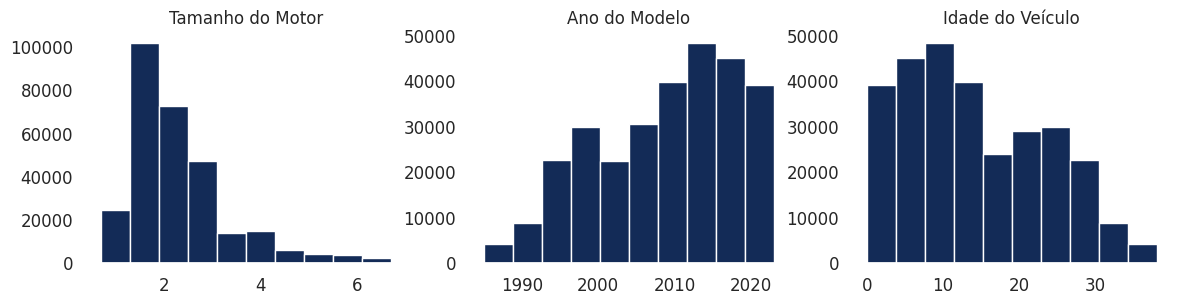

In [141]:
sns.set(rc={'axes.facecolor':'none','axes.grid':False,'xtick.labelsize':12,'ytick.labelsize':12})
fig, axes = plt.subplots(1, 3, figsize=(14,3))
year_model = dados_limpos.year_model.hist(ax=axes[1], color="#132B57", grid=False, ).set_title('Ano do Modelo')
age_years = dados_limpos.age_years.hist(ax=axes[2], color="#132B57", grid=False).set_title('Idade do Veículo')
engine_size = dados_limpos.engine_size.hist(ax=axes[0], color="#132B57", grid=False).set_title('Tamanho do Motor')

A fim de identicar a presença de outliers na medida de preço médio visualizamos a distribuição por histograma, box-plot. Nessa análise inicial vemos a presença grande de outliers nessa medida.

<Axes: title={'center': 'Preço Médio: Box e Whisker Plot'}>

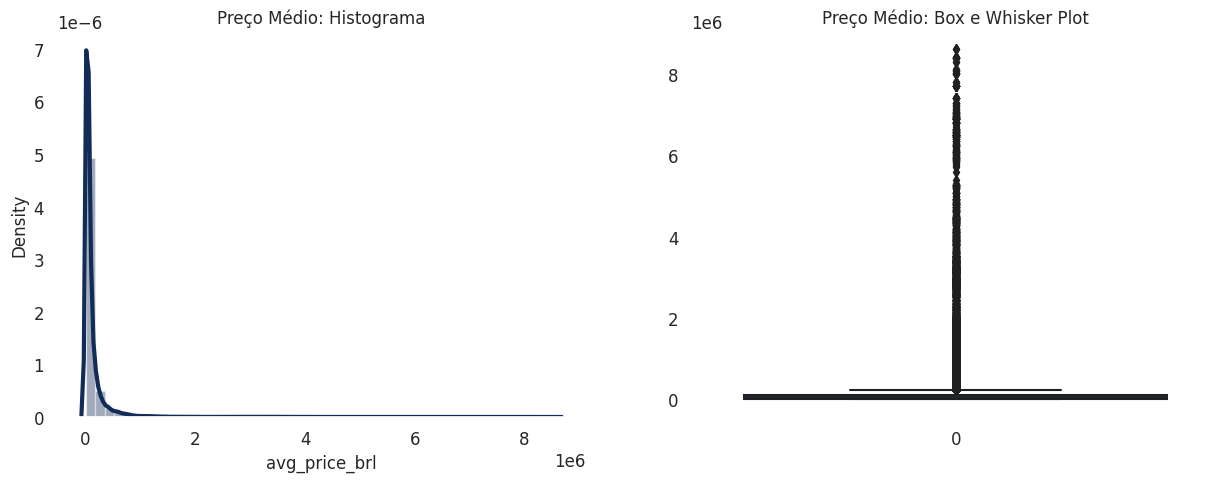

In [142]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Preço Médio: Histograma', fontdict={'fontsize':12})
sns.distplot(dados.avg_price_brl, color="#132B57", kde_kws={'linewidth':3})

plt.subplot(1,2,2)
plt.title('Preço Médio: Box e Whisker Plot', fontdict={'fontsize':12})
sns.boxplot(dados.avg_price_brl, color="#132B57")

Estamos priorizando acertar o preço dos carros mais populares, por conta disto, vamos remover os modelos que estão muito caros ou muito baratos (outliers).

**Inserir limpeza de outliers abaixo**

In [143]:
# Remoção de Outliers utilizando a feature 'avg_price_brl' como base

# Separação de quartis
Q1 = np.percentile(dados_limpos['avg_price_brl'], 25)

Q3 = np.percentile(dados_limpos['avg_price_brl'], 75)
IQR = Q3 - Q1

antes = dados_limpos.shape[0]
print(f"Quantidades linhas antes: {antes}")

# Limite Superior
upper = np.where(dados_limpos['avg_price_brl'] >= (Q3+1.5*IQR))
# Limite inferior
lower = np.where(dados_limpos['avg_price_brl'] <= (Q1-1.5*IQR))

# Remoção de Outliers
dados_limpos.drop(upper[0], inplace = True)
dados_limpos.drop(lower[0], inplace = True)

depois = dados_limpos.shape[0]
print(f"Quantidades linhas depois: {depois}")
print(f"Diferença: {antes - depois}")

Quantidades linhas antes: 290275
Quantidades linhas depois: 258277
Diferença: 31998


<Axes: title={'center': 'Preço Médio: Box e Whisker Plot'}>

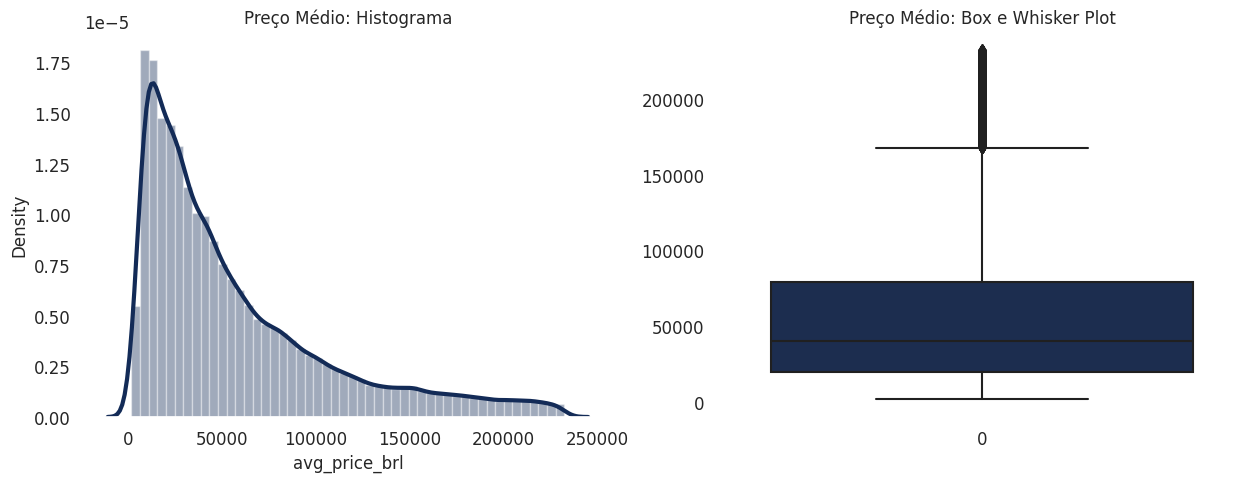

In [144]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Preço Médio: Histograma', fontdict={'fontsize':12})
sns.distplot(dados_limpos.avg_price_brl, color="#132B57", kde_kws={'linewidth':3})

plt.subplot(1,2,2)
plt.title('Preço Médio: Box e Whisker Plot', fontdict={'fontsize':12})
sns.boxplot(dados_limpos.avg_price_brl, color="#132B57")

Seguimos com a visualzição dos dados após a limpeza nos gráficos abaixo.

<Axes: title={'center': 'Preço Médio: Box e Whisker Plot-Outliers Removidos'}>

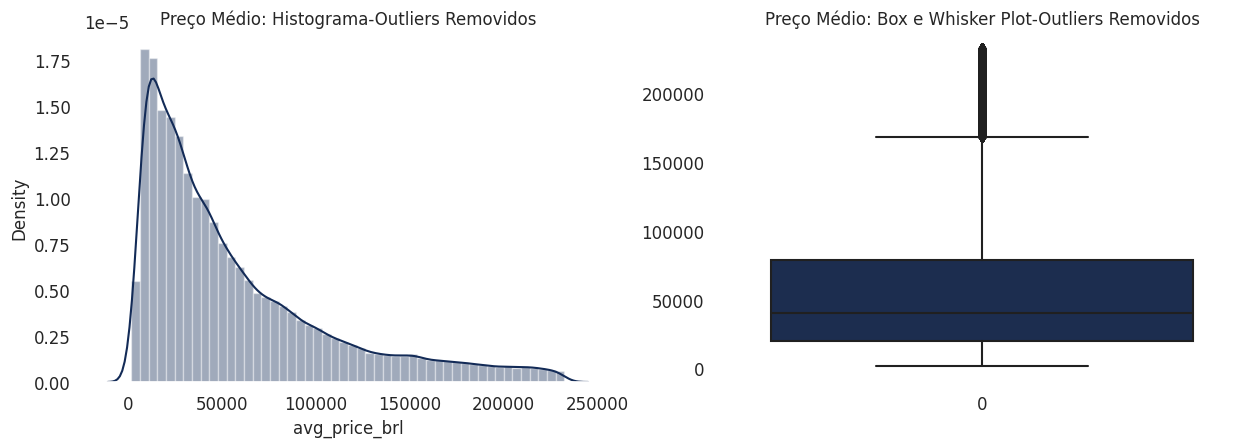

In [145]:
sns.set(rc={'axes.facecolor':'none','axes.grid':False,'xtick.labelsize':12,'ytick.labelsize':12})
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.title('Preço Médio: Histograma-Outliers Removidos', fontdict={'fontsize':12})
sns.distplot(dados_limpos.avg_price_brl, color="#132B57")

plt.subplot(2,2,2)
plt.title('Preço Médio: Box e Whisker Plot-Outliers Removidos', fontdict={'fontsize':12})
sns.boxplot(dados_limpos.avg_price_brl, color="#132B57")

### 4.2.Mapa de calor de correlação

Vamos dar inicio a nossa análise realizando um mapa de calor, buscando correlação entre as colunas numéricas.

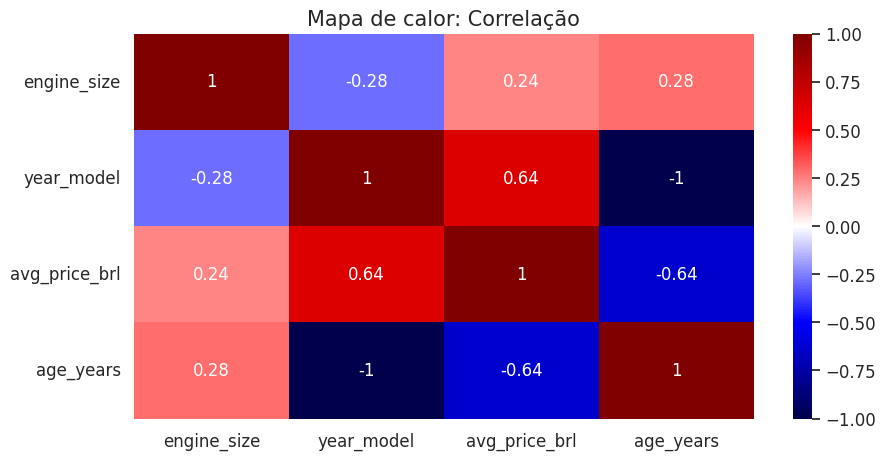

In [146]:
plt.figure(figsize=(10,5))
corr = dados_limpos.corr(method='pearson').round(4)
sns.heatmap(corr, annot=True, cmap='seismic')
plt.title("Mapa de calor: Correlação", fontdict={'fontsize':15})
plt.show()

A partir do mapa de calor podemos concluir os seguintes pontos:
- A idade do modelo e o ano são 100% codependentes;
- O preço do veículo depende bastante do modelo e da idade;
- O tamanho do motor tem baixa correlação com a idade e preço médio;

### 4.3. Manipulação dos valores categóricos.

Para utilizarmos os itens categóricos, utilizaremos a biblioteca ```Label Encoder```.

O Label Encoder é uma ferramenta para converter variáveis categóricas que possuem alguma relação de ordem. Ele mapeia os dados de texto em dados numéricos de ```0``` (zero) até ```n-1```, onde ```n``` representa o número de ocorrências diferentes.


In [147]:
## Separação das colunas em dados categóricos e numéricos

categoricos_df = dados_limpos[['month_of_reference', 'brand', 'model', 'fuel', 'gear']]
numericos_df = dados_limpos[['engine_size', 'year_model', 'avg_price_brl', 'age_years']]

In [148]:
# Importando o label encoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder ()

#Separando os dados categóricos em um único dataframe 
cat_df = dados_limpos[categoricos_df.columns]

# Realizando transformação de dados categóricos
for i in categoricos_df:
    categoricos_df[i] = le.fit_transform(dados_limpos[i])

#Unindo os dados numéricos com os categóricos
numericos_df = dados_limpos[numericos_df.columns]
dados_limpos = pd.concat([numericos_df, categoricos_df], axis=1)

In [149]:
dados_limpos.head()

,engine_size,year_model,avg_price_brl,age_years,month_of_reference,brand,model,fuel,gear
0,3.0,1995,43779.0,28,4,0,3290,2,1
1,3.0,1994,42244.0,29,4,0,3290,2,1
2,3.0,1993,40841.0,30,4,0,3290,2,1
3,3.0,1992,39028.0,31,4,0,3290,2,1
4,3.0,1991,35678.0,32,4,0,3290,2,1


A título de curiosidade, vamos fazer novamente um mapa de calor incluindo os dados categóricos transformados.

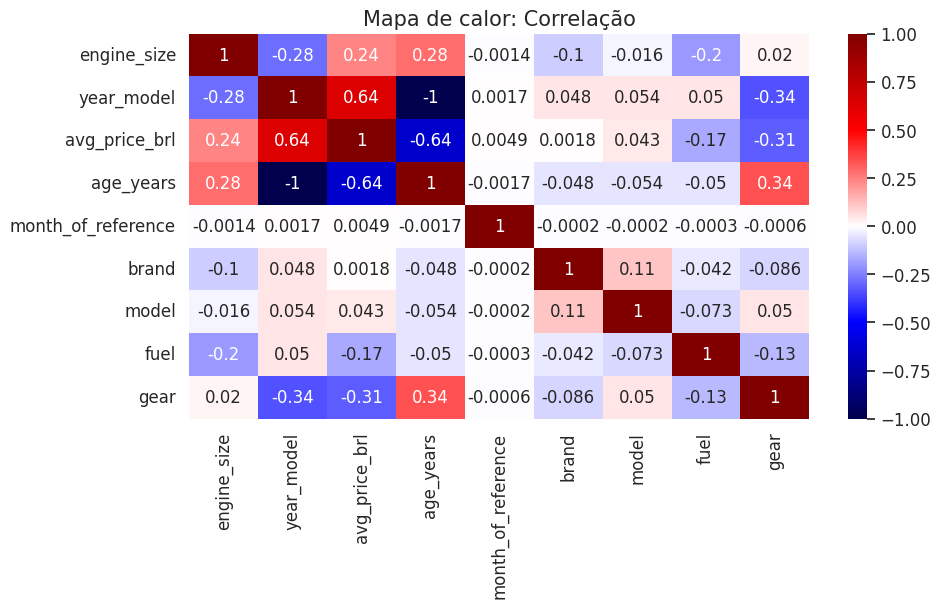

In [150]:
plt.figure(figsize=(10,5))
corr = dados_limpos.corr(method='pearson').round(4)
sns.heatmap(corr, annot=True, cmap='seismic')
plt.title("Mapa de calor: Correlação", fontdict={'fontsize':15})
plt.show()

Vemos que após aplicação do mapa de calor, o ```avg_price_brl``` (nosso target) possui uma correlação mais forte com os dados que originalmente eram numéricos. 

Vamos optar por manter as features ```fuel``` e ```gear``` enquanto que os demais serão removidos.

In [151]:
dados_limpos = dados_limpos.drop(['month_of_reference', 'brand', 'model'], axis=1)

## 5.Aplicação algoritmos ML

### 5.1. Separação de dados de entrada/saída e treinos/teste

Separando os dados de entrada/saída

In [152]:
# Separação de dados de entrada e dados de saída
X = dados_limpos.drop(columns=["avg_price_brl"], axis=1)
y = dados_limpos["avg_price_brl"]

Importações



In [153]:
# Bibliotecas de processamento de dados
from sklearn.preprocessing import StandardScaler

# Bibliotecas de averiguação de modelo e ajuste
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Pipeline e modelos de ML a serem usados neste trabalho
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

Separação em dados de treino e teste.

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

Definição de SEED para random states futuros

In [155]:
seed=42

Criação de função genérica para inserção de modelos

In [156]:
model_preds = []

def fit_model(model, model_name, name_tag, seed, ParamsGrid, n_split=10, Scoring="neg_mean_absolute_error", verb=10):

    pipe = Pipeline([("std_scaler", StandardScaler()),
                 (name_tag, model(random_state=seed))])

    splitter = StratifiedKFold(n_splits=n_split, shuffle=True, random_state=seed)

    grid = GridSearchCV(estimator=pipe,
                          param_grid=ParamsGrid,
                          scoring=Scoring,
                          cv=splitter,
                          verbose=verb)

    grid.fit(X_train, y_train)

    y_pred = grid.predict(X_test)

    r2 = round(r2_score(y_test, y_pred),4)
    adj_r2 = round(1 - (1-r2)*(len(y)-1)/(len(y)-X.shape[1]-1),4)
    mse = round(mean_squared_error(y_test, y_pred),4)
    mae = round(mean_absolute_error(y_test, y_pred),4)
    rmse = round(np.sqrt(mean_squared_error(y_test, y_pred)),4)
    model_preds.append([model_name, r2, adj_r2, mse, mae, rmse])

    print(f"\nMelhores Parâmetros\n{grid.best_params_}")
    
    print("\nMÉTRICAS\n")
    print("The R-Squared Value (r2) is: ", r2)
    print("Adjusted R-Squared Value (adj_r2) is: ", adj_r2)
    print("The Mean Squared error (MSE) is: ", mse)
    print("Root Mean Squared Error (RMSE)  is: ", rmse)
    print("Mean Absolute Error (MAE) is: ", mae)

def model_eval():
    preds = pd.DataFrame(model_preds)
    preds.columns = ["Mod_Name", "R2 Value", "adj_R2", "MSE", "RMSE", "MAE"]
    return preds.sort_values(by="R2 Value", ascending=False)

### 5.2. Decision Tree Regressor

Primeiro modelo que iremos treinar será o [Decision Tree Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html).

Vamos criar o pipeline e já realizar uma otimização dos hiperparâmetros do modelo conforme informado a seguir.

In [157]:
# params_grid_dtr = {"dtr__criterion" : ["squared_error", "friedman_mse", "absolute_error"],
#                   "dtr__splitter" : ["best", "random"],
#                   "dtr__max_depth" : range(4, 15),
#                   "dtr__min_samples_leaf" : range(1,5)}   

params_grid_dtr = {"dtr__criterion" : ["squared_error"],
                  "dtr__splitter" : ["best"],
                  "dtr__max_depth" : range(4, 5),
                  "dtr__min_samples_leaf" : range(1,2)}

In [158]:
fit_model(DecisionTreeRegressor, "Decision Tree Regressor", "dtr", seed, params_grid_dtr, 10, "neg_mean_absolute_error", 10)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV 1/10; 1/1] START dtr__criterion=squared_error, dtr__max_depth=4, dtr__min_samples_leaf=1, dtr__splitter=best
[CV 1/10; 1/1] END dtr__criterion=squared_error, dtr__max_depth=4, dtr__min_samples_leaf=1, dtr__splitter=best;, score=-17495.681 total time=   0.1s
[CV 2/10; 1/1] START dtr__criterion=squared_error, dtr__max_depth=4, dtr__min_samples_leaf=1, dtr__splitter=best
[CV 2/10; 1/1] END dtr__criterion=squared_error, dtr__max_depth=4, dtr__min_samples_leaf=1, dtr__splitter=best;, score=-17951.712 total time=   0.1s
[CV 3/10; 1/1] START dtr__criterion=squared_error, dtr__max_depth=4, dtr__min_samples_leaf=1, dtr__splitter=best
[CV 3/10; 1/1] END dtr__criterion=squared_error, dtr__max_depth=4, dtr__min_samples_leaf=1, dtr__splitter=best;, score=-17746.018 total time=   0.1s
[CV 4/10; 1/1] START dtr__criterion=squared_error, dtr__max_depth=4, dtr__min_samples_leaf=1, dtr__splitter=best
[CV 4/10; 1/1] END dtr__criterion=square

### 5.3. Random Forest Regressor 

Próximo modelo que iremos treinar será o [Random Forest Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html).

Vamos criar o pipeline e já realizar uma otimização dos hiperparâmetros do modelo conforme informado a seguir.

In [159]:
# params_grid_rfr = {"rfr__n_estimators" : np.arange(100, 1100, 100),
#                   "rfr__criterion" : ["squared_error", "absolute_error", "friedman_mse", "poisson"],
#                   "rfr__max_depth" : range(4, 15),
#                   "rfr__min_samples_leaf" : range(1,5)}   

params_grid_rfr = {"rfr__criterion" : ["squared_error"],
                  "rfr__max_depth" : range(4, 5),
                  "rfr__min_samples_leaf" : range(1,2)}

In [160]:
fit_model(RandomForestRegressor, "Random Forest Regressor","rfr", seed, params_grid_rfr, 10, "neg_mean_absolute_error", 10)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV 1/10; 1/1] START rfr__criterion=squared_error, rfr__max_depth=4, rfr__min_samples_leaf=1
[CV 1/10; 1/1] END rfr__criterion=squared_error, rfr__max_depth=4, rfr__min_samples_leaf=1;, score=-17267.712 total time=   7.2s
[CV 2/10; 1/1] START rfr__criterion=squared_error, rfr__max_depth=4, rfr__min_samples_leaf=1
[CV 2/10; 1/1] END rfr__criterion=squared_error, rfr__max_depth=4, rfr__min_samples_leaf=1;, score=-17789.022 total time=   8.0s
[CV 3/10; 1/1] START rfr__criterion=squared_error, rfr__max_depth=4, rfr__min_samples_leaf=1
[CV 3/10; 1/1] END rfr__criterion=squared_error, rfr__max_depth=4, rfr__min_samples_leaf=1;, score=-17544.843 total time=   8.2s
[CV 4/10; 1/1] START rfr__criterion=squared_error, rfr__max_depth=4, rfr__min_samples_leaf=1
[CV 4/10; 1/1] END rfr__criterion=squared_error, rfr__max_depth=4, rfr__min_samples_leaf=1;, score=-17495.402 total time=   7.2s
[CV 5/10; 1/1] START rfr__criterion=squared_error, 

### 5.4. Comparações

Seguem abaixo as métricas de avaliação dos modelos.

In [162]:
comparacao = model_eval()
comparacao

,Mod_Name,R2 Value,adj_R2,MSE,RMSE,MAE
1,Random Forest Regressor,0.7277,0.7277,7.027506e+08,17519.9205,26509.4430
0,Decision_Tree_Regressor,0.7220,0.7220,7.175084e+08,17695.0670,26786.3467


In [165]:
melhor_modelo = comparacao['Mod_Name'][0]
print(f'Melhor modelo: {melhor_modelo}')

Melhor modelo: Decision_Tree_Regressor


## 6.Conclusões

## 7.Referências